# Exploración y visualización de patrones

**Objetivo:** Analizar visualmente la estructura de los datos para guiar la selección de modelos predictivos.

## Carga del dataset y librerías

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset limpio
df = pd.read_csv('/workspaces/suicidio/Datos/Presuntos_Suicidios._Colombia.csv', sep=';')
df.head()

,ID,Año del hecho,Grupo Mayor Menor de Edad,Ciclo Vital,Sexo,Estado Civil,País de Nacimiento,Escolaridad,Pertenencia Grupal,Mes,...,Código Dane Municipio,Municipio,Departamento,Código,Escenario,Zona,Mecanismo Causal,Diagnostico Topográfico de la Lesión,Razón del Suicidio,Ancestro Racial
0,1,2015,b) Mayores de Edad (>18 años),(18 a 28) Juventud,Mujer,Soltero(a),Colombia,Educación inicial y educación preescolar,Grupos étnicos,Enero,...,66572,Pueblo Rico,Risaralda,66,Vivienda,Cabecera municipal,Generadores de asfixia,Trauma de cuello,Sin información,Indigena
1,2,2015,b) Mayores de Edad (>18 años),(18 a 28) Juventud,Hombre,Soltero(a),Colombia,Educación inicial y educación preescolar,Ninguno,Enero,...,81001,Arauca,Arauca,81,Vivienda,Parte rural (vereda y campo),Generadores de asfixia,Trauma de cuello,Conflicto con pareja o ex pareja,Mestizo
2,3,2015,b) Mayores de Edad (>18 años),(29 a 59) Adultez,Hombre,Unión libre,Colombia,Educación inicial y educación preescolar,Campesinos (as) y/o trabajadores (as) del campo,Enero,...,81220,Cravo Norte,Arauca,81,Zonas de Actividades Agropecuarias,Parte rural (vereda y campo),Tóxico,Politraumatismo,Conflicto con pareja o ex pareja,Mestizo
3,4,2015,b) Mayores de Edad (>18 años),(29 a 59) Adultez,Hombre,Soltero(a),Colombia,Educación inicial y educación preescolar,Ninguno,Enero,...,63470,Montenegro,Quindío,63,Vivienda,Cabecera municipal,Generadores de asfixia,Trauma de cuello,Sin información,Mestizo
4,5,2015,b) Mayores de Edad (>18 años),(29 a 59) Adultez,Hombre,Soltero(a),Colombia,Educación media o secundaria alta,Ninguno,Enero,...,63130,Calarca,Quindío,63,Zonas de Actividades Agropecuarias,Parte rural (vereda y campo),Tóxico,Politraumatismo,Sin información,Mestizo


## Visualización univariada: distribuciones


### 📊 Análisis de la distribución de Edad

La siguiente gráfica muestra un histograma con curva KDE para la variable `Edad` del conjunto de datos.

#### ✅ ¿Qué representa esta visualización?
- El **histograma** muestra la cantidad de personas por rangos de edad.
- La **curva KDE** (Kernel Density Estimation) estima la densidad de la distribución de forma suave y continua.

#### 🔍 Observaciones:
- Distribución aproximadamente simétrica.
- Pico de concentración entre los 30 y 40 años.
- Sin presencia de outliers extremos.
- La forma de la curva sugiere una distribución cercana a la normal.

#### 🧠 Interpretación:
- `Edad` es una variable estable, centrada, sin sesgos notables.
- Puede utilizarse sin transformaciones en modelos que asumen normalidad (regresión, árboles, etc.).

#### ✍️ Conclusión:
> La variable `Edad` presenta una distribución regular, con un perfil adecuado para el análisis predictivo directo sin necesidad de transformaciones.


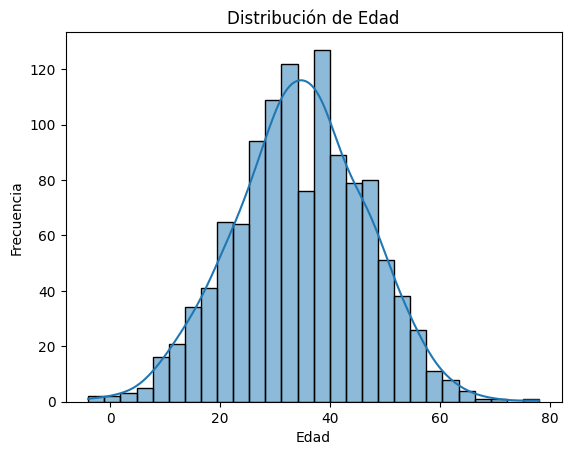

In [ ]:
# Histograma de Edad
sns.histplot(df['Edad'], kde=True)
plt.title('Distribución de Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()


### 📦 Análisis del boxplot de Ingreso

El gráfico representa la dispersión de ingresos y la presencia de valores extremos.

#### ✅ ¿Qué muestra un boxplot?
- Caja: intervalo intercuartílico (IQR), que abarca el 50% central de los datos.
- Línea interna: mediana.
- Líneas externas (bigotes): valores dentro de 1.5 veces el IQR.
- Puntos individuales: **outliers**, datos atípicos fuera del rango esperado.

#### 🔍 Observaciones:
- Mediana cerca de 4800.
- IQR entre 4000 y 5500.
- Outliers hacia ambos extremos (por debajo de 2000 y por encima de 7000).
- Simetría moderada.

#### 🧠 Interpretación:
- `Ingreso` presenta cierta dispersión natural entre personas.
- Algunos valores extremos pueden requerir tratamiento si afectan el análisis.

#### ✍️ Conclusión:
> Aunque razonablemente distribuido, `Ingreso` contiene outliers que deben monitorearse si se aplican modelos sensibles a magnitudes como regresión o KNN.


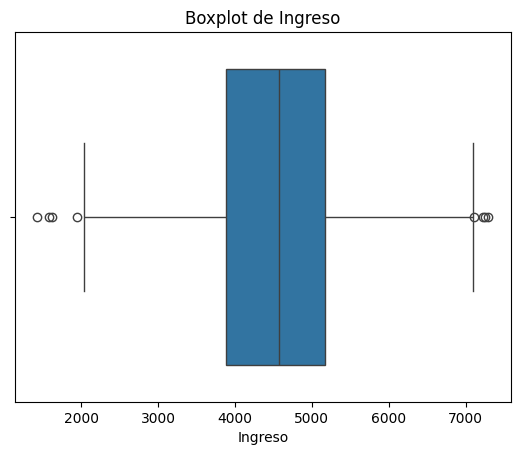

In [ ]:
# Boxplot de Ingreso
sns.boxplot(x=df['Ingreso'])
plt.title('Boxplot de Ingreso')
plt.xlabel('Ingreso')
plt.show()


### 🔁 Análisis de dispersión: Edad vs Ingreso

La gráfica es un **scatterplot (diagrama de dispersión)** que visualiza la relación entre `Edad` e `Ingreso`.

#### ✅ ¿Qué representa?
- Cada punto es una persona.
- El eje X representa la `Edad`, el eje Y representa el `Ingreso`.
- La concentración o forma del grupo puede revelar correlaciones.

#### 🔍 Observaciones:
- No hay una relación lineal fuerte evidente.
- Dispersión moderada con mayor variabilidad en edades medias.
- Algunas concentraciones pueden indicar subgrupos poblacionales.

#### 🧠 Interpretación:
- La relación entre `Edad` e `Ingreso` parece débil.
- Puede haber patrones no lineales o efectos de otras variables (por ejemplo, educación o ciudad).

#### ✍️ Conclusión:
> Aunque `Edad` e `Ingreso` no están linealmente correlacionados, podrían mostrar interacciones útiles al combinarlas con otras variables.


## Visualización bivariada: relaciones y correlaciones


### 🔥 Análisis de la matriz de correlación

El mapa de calor representa la matriz de correlación entre variables numéricas.

#### ✅ ¿Qué mide la correlación?
- Relación lineal entre dos variables (de -1 a 1).
- Valores cercanos a 0 indican baja o nula correlación.

#### 🔍 Observaciones:
- `Edad` y `Ingreso` tienen una correlación débilmente positiva.
- `Horas_Internet` no muestra correlación significativa con las demás.
- No hay señales de multicolinealidad entre variables.

#### 🧠 Interpretación:
- Es poco probable que haya redundancia entre las variables numéricas.
- Cada variable puede aportar información diferente al modelo.

#### ✍️ Conclusión:
> Las variables numéricas analizadas no están fuertemente correlacionadas entre sí, lo cual es positivo para la construcción de modelos multivariados.


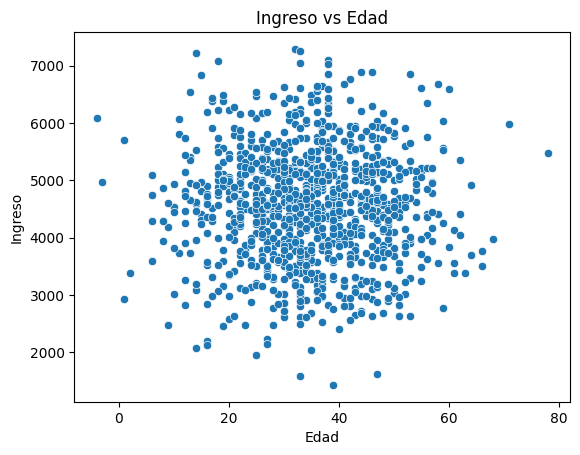

In [ ]:
# Dispersión entre Edad e Ingreso
sns.scatterplot(x='Edad', y='Ingreso', data=df)
plt.title('Ingreso vs Edad')
plt.xlabel('Edad')
plt.ylabel('Ingreso')
plt.show()


### 🧭 Análisis conjunto de outliers

El gráfico muestra los boxplots individuales de `Edad`, `Ingreso` y `Horas_Internet` para comparar su rango y presencia de outliers.

#### 🔍 Observaciones:
- `Edad` presenta una distribución compacta y sin outliers relevantes.
- `Ingreso` muestra varios valores atípicos por encima de 7000 y debajo de 2000.
- `Horas_Internet` tiene algunos extremos bajos (cerca de 0), pero no exagerados.

#### 🧠 Interpretación:
- `Ingreso` es la variable más dispersa y con mayor concentración de valores extremos.
- Las otras variables son más estables en su rango y podrían requerir menos tratamiento.

#### ✍️ Conclusión:
> Al modelar, puede ser conveniente escalar o transformar `Ingreso` y analizar si los valores extremos deben excluirse o tratarse por separado.


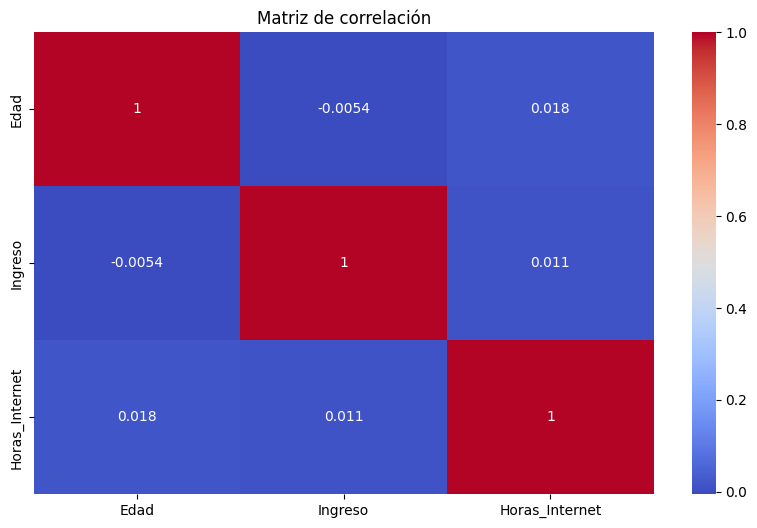

In [ ]:
# Mapa de calor de correlaciones numéricas
plt.figure(figsize=(10, 6))
sns.heatmap(df[['Edad', 'Ingreso', 'Horas_Internet']].corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()

## Detección visual de outliers

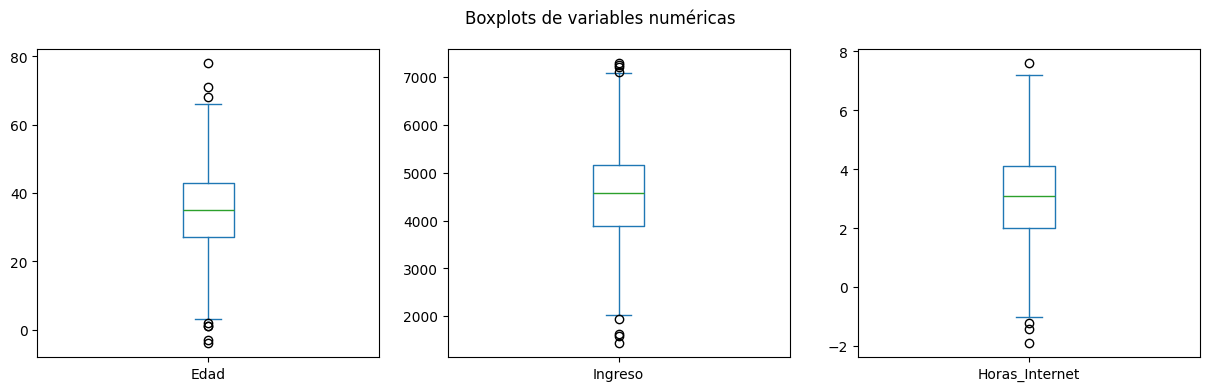

In [ ]:
# Boxplot conjunto
df[['Edad', 'Ingreso', 'Horas_Internet']].plot(kind='box', subplots=True, layout=(1, 3), figsize=(15, 4))
plt.suptitle('Boxplots de variables numéricas')
plt.show()

## Conclusión y reflexión

Con base en las visualizaciones:

- ¿Qué variables parecen tener distribuciones sesgadas?
- ¿Hay outliers notables que deban ser tratados?
- ¿Qué relaciones bivariadas parecen fuertes o débiles?
- ¿Qué variables podrían ser útiles en un modelo predictivo?

> Reflexiona sobre qué tipo de modelo podría ajustarse bien a estos datos, con base en los patrones visuales observados.
